In [2]:
using Distributions
using LinearAlgebra
using Gadfly
using Random
using QuantumRelay
using SymPy

In [ ]:
alpha=pi/8
delta=2pi/6
name="name"
n = 6

chi = fill(sqrt(0.06), n)
phi = [im * tanh(chi[j]) for j=1:n]
omega = [1.0 / prod(cosh(chi[k]))^2 for k=1:n]
syms, op = qrelay_op(n, phi, alpha, delta)
op_a, op_ab, mat, coef = op_mat(op)

op_q2 = [syms.apH[1], syms.apV[1], syms.bpH[end], syms.bpV[end]]
op_q1 = [syms.apH[2:end]..., syms.apV[2:end]..., syms.bpH[1:end-1]..., syms.bpV[1:end-1]...]
mask_q1 = [op in op_q1 for op in op_a];
    
mask_q2 = [op in op_q2 for op in op_a];
qq = [x in syms.apH || x in syms.bpV ? 1 : 0 for x in op_a]
           
pdet0 = pdet_maker(0.04, 1e-5)
qrs = QRelaySampler(mat, coef, omega, pdet0)
targetcache=Dict{Vector{Int}, Float64}()
target(x::Vector)= (qrs.prob(qq, x, mask_q1) * qrs.prob(x))

In [57]:
target(qq)

6-element Array{Float64,1}:
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25

In [58]:
result=[]
Iteration=10000
chain=[zeros(length(qq)) for j in 1:Iteration]
dist= qrs.psetproposal
accept_rate= zeros(Iteration)
ln_prob=zeros(Iteration)
naccept=0

@time for i in 1:Iteration
    current= qq
    proposal= rand(dist(current)) 
    C= target(proposal)/target(current)
    ratio= min(1, C[1,1])
    uniform=rand()
    if uniform< ratio
        push!(result, proposal)
        current= proposal
        
        global naccept+=1
    else
        current=current
        
    end
    chain[i]= current
    accept_rate[i]= naccept/i
    ln_prob[i]=target(current)[1]
end
print(result)

funcQ(v) = qrs.prob(qq, v, mask_q2)

815.724348 seconds (113.49 M allocations: 16.416 GiB, 0.70% gc time)


Any[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2], [2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1], [0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 

funcQ (generic function with 1 method)

In [59]:
length(result)

230

In [63]:
naccept

230

In [64]:
findmax(accept_rate)

(0.02627986348122867, 2930)

In [65]:
ln_prob

10000-element Array{Float64,1}:
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 ⋮                     
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25
 2.1120203971370536e-25

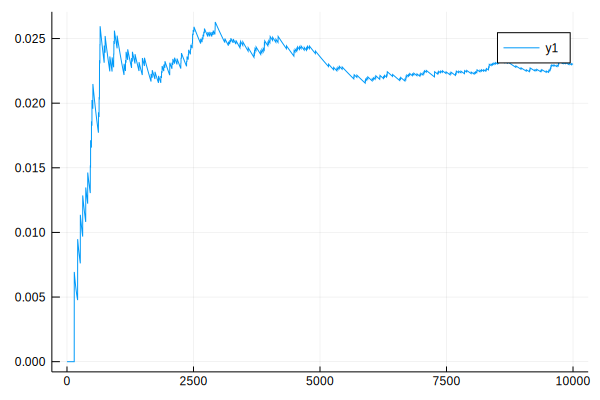

In [66]:
using Plots
Plots.plot(accept_rate)

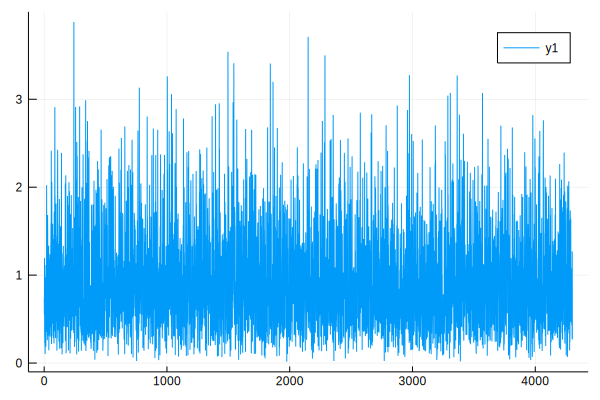

In [148]:
Plots.plot(results)

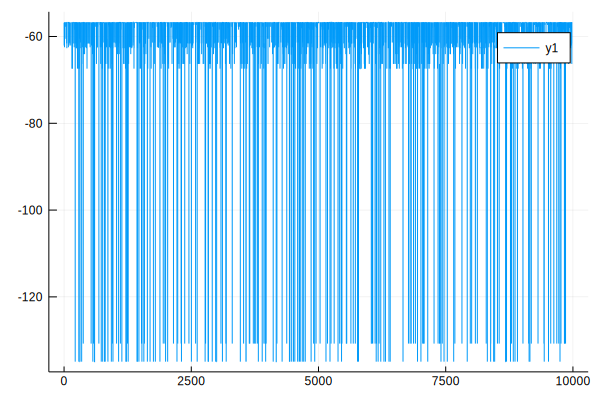

In [30]:
Plots.plot(ln_prob)

In [131]:
display(result)

3394-element Array{Any,1}:
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 1  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 1  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 1, 0, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [0, 1, 1, 1, 1, 1, 0, 0, 1, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 1  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [2, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 2]
 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
 [0, 1, 1, 1, 1, 1, 0, 0, 1, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
 ⋮                                                              
 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 1, 1, 0, 1

In [139]:
#an example on the normal distribution to make sure that the mcmc pattern works
log_traget(x)= log((1/sqrt(2*pi*2^2))*exp((-(x-10)^2)/(2*2^2)))
proposal(x)=(Normal(x,1))
initial=0
results=[]
Iteration=10000
Chain=zeros(Iteration)
acceptrate= zeros(Iteration)
MH=zeros(Iteration)   #the Metropolis-Hasting term
accept=0
for i in 1:Iteration
    current= initial
    proposed= rand(proposal(current)) 
    log_C= log_traget(proposed)-log_traget(current)
    
    ratio= min(1, log_C)
    uniform=rand()
    if uniform< ratio
        push!(results, proposed)
        current= proposed
        
        global accept+=1
    else
        current=current
        
    end
    Chain[i]= current
    acceptrate[i]= accept/i
    MH[i]=ratio
end

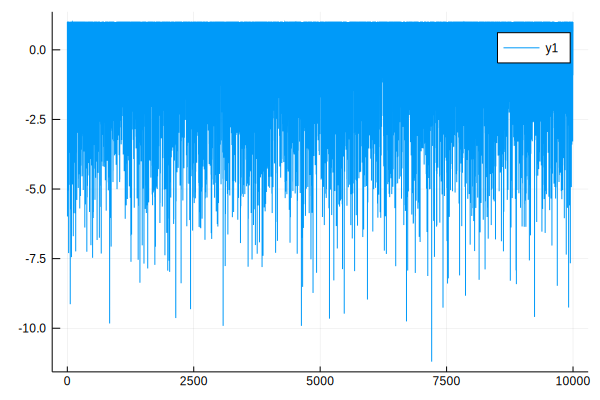

In [149]:
Plots.plot(MH)

In [141]:
accept

4302

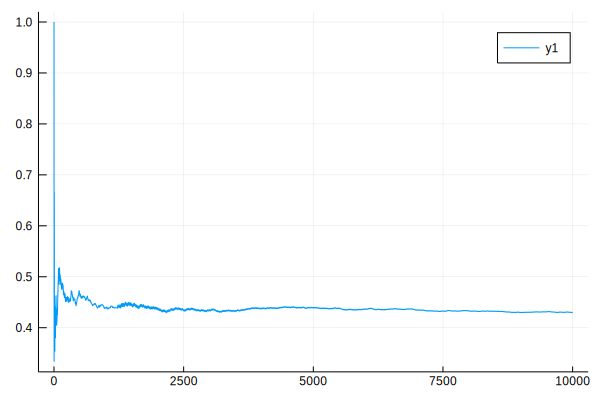

In [142]:
Plots.plot(acceptrate)

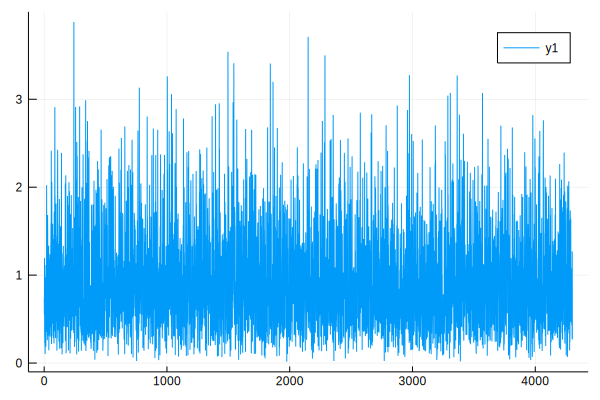

In [143]:
using Plots
Plots.plot(results)

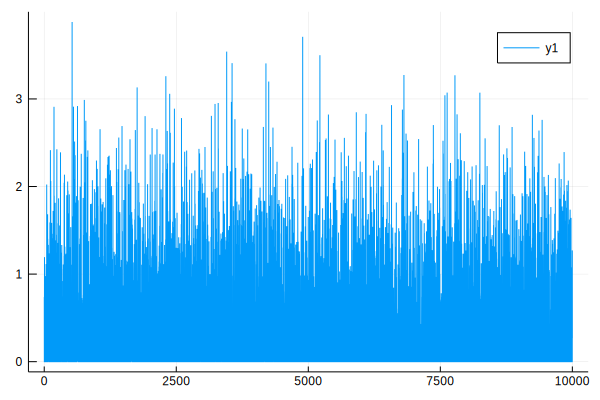

In [144]:
Plots.plot(Chain)

In [145]:
proposed

0.2691915394325182

In [146]:
MH

10000-element Array{Float64,1}:
  1.0                
 -1.5500530110255788 
 -5.984534657674207  
  1.0                
  1.0                
  0.9877363110508028 
 -3.1591805460059277 
 -1.6616932620693134 
 -3.504488135448785  
 -1.1853784644868544 
  0.5670124293275833 
 -1.0362884171120914 
  1.0                
  ⋮                  
 -3.151803740132813  
 -3.0482080835868786 
  1.0                
 -1.1602866483553491 
 -3.291852181527293  
  0.1857806996290634 
  0.41378783133826325
  1.0                
  0.6828919628446251 
 -0.9130207160092549 
  1.0                
  0.6639208379685382 